In [11]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from utils import check_nan, check_unique
from matplotlib import gridspec
from matplotlib import rcParams
from collections import Counter

from datetime import datetime, timedelta


import requests
import urllib.parse
from datetime import datetime
import matplotlib.pyplot as plt
import geopy.distance
from geopy.distance import distance
#from mpl_toolkits.basemap import Basemap

from keras.utils.vis_utils import plot_model

import tensorflow as tf 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 

from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Model

#Paramètres graphiques 
rcParams['figure.figsize'] = 15,8 #Taille de la figure affichée
sns.set_style("darkgrid")#style de l'arrière plan de seaborn 
sns.set_palette("pastel")#Couleurs utilisées dans les graphiques 
plt.rcParams["figure.dpi"] = 200 #dpi = dot per inch , résolution des graphiques 
pd.set_option('display.max_columns', 500) #Nombre de colonne maximum du dataframe à afficher

# import warnings
# warnings.simplefilter(action='ignore')

In [12]:
def get_index_col(df , cols): 
    list_indexes = []
    for col in cols : 
        list_indexes.append(df.columns.get_loc(col))
    return list_indexes 

In [13]:
def date_split(df,cols): 
    for col in cols : 
        df[col+str("_dayweek")]=df[col].dt.dayofweek
        df[col+str("_hour")]=df[col].dt.hour
        df[col+str("_min")]=df[col].dt.minute

## Datetimes : 

In [14]:
df = pd.read_csv("data_processed_cleaned.csv")
cols_datetime = ["save_datetime","actual_datetime","datetime_arrivee_prevue","arrivee_reelle_station_pred","last_station_arrivee_prevue","last_station_arrivee_reelle","full_day"]

for col in cols_datetime : 
    df[col]=pd.to_datetime(df[col]) 
date_split(df,["datetime_arrivee_prevue","actual_datetime","last_station_arrivee_reelle","last_station_arrivee_prevue"])
df.head()

,save_datetime,transporteur,date_depart_trajet,retard,station_pred,id_train,datetime_arrivee_prevue,arrivee_reelle_station_pred,depart,destination,actual_datetime,last_station,last_station_arrivee_prevue,last_station_arrivee_reelle,last_station_retard,full_day,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun,tavg_d,tmin_d,tmax_d,prcp_d,snow_d,wdir_d,wspd_d,wpgt_d,pres_d,tsun_d,dist,day_now,dayofweek_num_now,hour_now,minute_now,delta_temps_stations,all_passa_station_d,all_passa_station_h,datetime_arrivee_prevue_dayweek,datetime_arrivee_prevue_hour,datetime_arrivee_prevue_min,actual_datetime_dayweek,actual_datetime_hour,actual_datetime_min,last_station_arrivee_reelle_dayweek,last_station_arrivee_reelle_hour,last_station_arrivee_reelle_min,last_station_arrivee_prevue_dayweek,last_station_arrivee_prevue_hour,last_station_arrivee_prevue_min
0,2022-05-16 00:30:00,PKP SKM w Trójmieście Sp. z o.o.,2022-05-16,0,Gdynia Wzgórze Św.Maksymiliana,95401,2022-05-16 00:35:00,2022-05-16 00:35:00,Gdańsk Śródmieście,Gdynia Cisowa,2022-05-16 00:05:00,Gdańsk Stocznia,2022-05-16 00:05:00,2022-05-16 00:05:00,0.0,2022-05-16,11.1,4.0,18.0,0.0,0.0,340.0,11.0,27.8,1020.3,0.0,11.1,4.0,18.0,0.0,0.0,340.0,11.0,27.8,1020.3,0.0,17.345918,16,0,0,5,30,0,0,0,0,35,0,0,5,0,0,5,0,0,5
1,2022-05-16 00:35:00,PKP SKM w Trójmieście Sp. z o.o.,2022-05-16,0,Gdynia Główna,95401,2022-05-16 00:37:00,2022-05-16 00:37:00,Gdańsk Śródmieście,Gdynia Cisowa,2022-05-16 00:07:00,Gdańsk Stocznia,2022-05-16 00:05:00,2022-05-16 00:05:00,0.0,2022-05-16,11.1,4.0,18.0,0.0,0.0,340.0,11.0,27.8,1020.3,0.0,11.1,4.0,18.0,0.0,0.0,340.0,11.0,27.8,1020.3,0.0,18.983176,16,0,0,7,32,0,0,0,0,37,0,0,7,0,0,5,0,0,5
2,2022-05-16 00:40:00,PKP SKM w Trójmieście Sp. z o.o.,2022-05-16,0,Gdynia Stocznia-Uniwersytet Morski,95401,2022-05-16 00:40:00,2022-05-16 00:40:00,Gdańsk Śródmieście,Gdynia Cisowa,2022-05-16 00:10:00,Gdańsk Wrzeszcz,2022-05-16 00:10:00,2022-05-16 00:10:00,0.0,2022-05-16,11.1,4.0,18.0,0.0,0.0,340.0,11.0,27.8,1020.3,0.0,11.1,4.0,18.0,0.0,0.0,340.0,11.0,27.8,1020.3,0.0,16.954166,16,0,0,10,30,0,0,0,0,40,0,0,10,0,0,10,0,0,10
3,2022-05-16 00:40:00,PKP SKM w Trójmieście Sp. z o.o.,2022-05-16,0,Gdynia Leszczynki,95401,2022-05-16 00:44:00,2022-05-16 00:44:00,Gdańsk Śródmieście,Gdynia Cisowa,2022-05-16 00:14:00,Gdańsk Zaspa,2022-05-16 00:13:00,2022-05-16 00:13:00,0.0,2022-05-16,11.1,4.0,18.0,0.0,0.0,340.0,11.0,27.8,1020.3,0.0,11.1,4.0,18.0,0.0,0.0,340.0,11.0,27.8,1020.3,0.0,18.399792,16,0,0,14,31,0,0,0,0,44,0,0,14,0,0,13,0,0,13
4,2022-05-16 00:45:00,PKP SKM w Trójmieście Sp. z o.o.,2022-05-16,0,Gdynia Chylonia,95401,2022-05-16 00:47:00,2022-05-16 00:47:00,Gdańsk Śródmieście,Gdynia Cisowa,2022-05-16 00:17:00,Gdańsk Przymorze-Uniwersytet,2022-05-16 00:15:00,2022-05-16 00:15:00,0.0,2022-05-16,11.1,4.0,18.0,0.0,0.0,340.0,11.0,27.8,1020.3,0.0,11.1,4.0,18.0,0.0,0.0,340.0,11.0,27.8,1020.3,0.0,17.726306,16,0,0,17,32,0,0,0,0,47,0,0,17,0,0,15,0,0,15


# Mise en forme des données 

In [15]:
check_nan(df)
print()
check_unique(df)

Valeurs nan dans save_datetime : 0
Valeurs nan dans transporteur : 0
Valeurs nan dans date_depart_trajet : 0
Valeurs nan dans retard : 0
Valeurs nan dans station_pred : 0
Valeurs nan dans id_train : 0
Valeurs nan dans datetime_arrivee_prevue : 0
Valeurs nan dans arrivee_reelle_station_pred : 0
Valeurs nan dans depart : 0
Valeurs nan dans destination : 0
Valeurs nan dans actual_datetime : 0
Valeurs nan dans last_station : 0
Valeurs nan dans last_station_arrivee_prevue : 0
Valeurs nan dans last_station_arrivee_reelle : 0
Valeurs nan dans last_station_retard : 0
Valeurs nan dans full_day : 0
Valeurs nan dans tavg : 0
Valeurs nan dans tmin : 0
Valeurs nan dans tmax : 0
Valeurs nan dans prcp : 0
Valeurs nan dans snow : 0
Valeurs nan dans wdir : 0
Valeurs nan dans wspd : 0
Valeurs nan dans wpgt : 0
Valeurs nan dans pres : 0
Valeurs nan dans tsun : 0
Valeurs nan dans tavg_d : 0
Valeurs nan dans tmin_d : 0
Valeurs nan dans tmax_d : 0
Valeurs nan dans prcp_d : 0
Valeurs nan dans snow_d : 0
Vale

### Drop des colonnes : 

In [16]:
df= df.set_index("actual_datetime")

#On peut droper la colonne snow car elle n'a qu'une seule valeur dans toute la table 
cols_to_drop=["save_datetime","date_depart_trajet","datetime_arrivee_prevue","arrivee_reelle_station_pred",
              "last_station_arrivee_prevue","last_station_arrivee_reelle","full_day","snow","snow_d",
               'dayofweek_num_now', 'hour_now', 'minute_now']
df.drop(columns= cols_to_drop, inplace=True)
df.shape

(211154, 43)

# Deep learning 

## Embedding 

In [17]:
df_model =df.copy(deep=True)

In [18]:
cols_to_embed1 =["station_pred","depart","destination","last_station"]
cols_to_embed2=["id_train"]

def words_to_index(df, cols):
    list_words=[]
    for col in cols : 
        list_words+=df[col].unique().tolist()
    list_words=list(set(list_words))
    
    indexes_to_words= pd.Series(list_words)
    words_to_indexes =pd.Series(indexes_to_words.index.values, index=indexes_to_words)
    return indexes_to_words.to_dict(), words_to_indexes.to_dict()

indexes_to_words1,words_to_indexes1 = words_to_index(df_model, cols_to_embed1) 
indexes_to_words2,words_to_indexes2 = words_to_index(df_model, cols_to_embed2) 

In [19]:
cols_to_embed1 =["station_pred","depart","destination","last_station"]
cols_to_embed2=["id_train"]

def words_to_index(df, cols):
    list_words=[]
    for col in cols : 
        list_words+=df[col].unique().tolist()
    list_words=list(set(list_words))
    
    indexes_to_words= pd.Series(list_words)
    words_to_indexes =pd.Series(indexes_to_words.index.values, index=indexes_to_words)
    return indexes_to_words.to_dict(), words_to_indexes.to_dict()

indexes_to_words1,words_to_indexes1 = words_to_index(df_model, cols_to_embed1) 
indexes_to_words2,words_to_indexes2 = words_to_index(df_model, cols_to_embed2) 

for col in cols_to_embed1 : 
    df_model[col]=df_model[col].map(words_to_indexes1)
    
for col in cols_to_embed2 : 
    df_model[col]=df_model[col].map(words_to_indexes2)

### One hot encoding 

In [20]:
df_model=pd.get_dummies(df_model, columns=["transporteur"])

#### Split train test 

In [21]:
cols_to_drop= ["day_now"]
from sklearn.model_selection import train_test_split

X = df_model.iloc[:,1:]
y = df_model["retard"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)



print("X_train shape : ",X_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",X_test.shape)
print("y_test shape : ",y_test.shape)

X_train shape :  (158365, 51)
y_train shape :  (158365,)
X_test shape :  (52789, 51)
y_test shape :  (52789,)


### Séparation Embeddings 

In [22]:
index_embed1 = get_index_col(X_train, cols_to_embed1)
index_embed2 = get_index_col(X_train,cols_to_embed2)

X_train.iloc[:,index_embed1]

,station_pred,depart,destination,last_station
actual_datetime,,,,
2022-05-27 16:49:00,290,90,227,118
2022-05-20 08:14:00,184,129,184,114
2022-05-29 12:02:00,162,79,131,119
2022-05-17 07:11:00,310,307,90,233
2022-05-18 10:44:00,161,227,154,139
...,...,...,...,...
2022-05-24 04:45:00,139,154,227,118
2022-05-19 07:34:00,224,227,228,290
2022-05-21 19:02:00,119,128,5,37


In [24]:
X_train_e1 = X_train.iloc[:,index_embed1]
X_train_e2 = X_train.iloc[:,index_embed2]
X_train_rest= X_train.drop(columns =cols_to_embed1 + cols_to_embed2)


X_test_e1 = X_test.iloc[:,index_embed1]
X_test_e2 = X_test.iloc[:,index_embed2]
X_test_rest= X_test.drop(columns =cols_to_embed1 + cols_to_embed2)

## Normalisation des données

In [25]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train_rest)
X_train_rest_scaled =scaler.transform(X_train_rest)
X_test_rest_scaled=scaler.transform(X_test_rest)

### Création du modèle 

In [26]:
V1 = len(words_to_indexes1)
V2 = len(words_to_indexes2)

In [27]:
from tensorflow.keras.layers import Dense, Input, Embedding, BatchNormalization, Flatten, concatenate

D1 = 5
D2= 5

#Les données sont séparées en 3 inputs
inputA = Input(shape=(X_train_rest.shape[1],))
inputB = Input(shape=(X_train_e1.shape[1],))
inputC = Input(shape=(X_train_e2.shape[1],))


#Premier embedding : 
xB = Embedding(V1 , D1)(inputB)
xB=Flatten()(xB)
xB=Dense(64,activation="relu")(xB)
xB=BatchNormalization()(xB)
xB = Model(inputs=inputB, outputs=xB)

#Deuxième embedding
xC =Embedding(V2, D2)(inputC)
xC = Flatten()(xC)
xC = Dense(64, activation="relu")(xC)
xC= BatchNormalization()(xC)
xC = Model(inputs= inputC, outputs=xC)

#On réuni les données : 
combined= concatenate([inputA, xB.output, xC.output])

z = Dense(1024 , activation="relu")(combined)
#z = Dense(1024 , activation="relu")(z)
z = Dense(1024 , activation="relu")(z)
#z =BatchNormalization()(z)
z= Dense(256, activation="relu")(z)
z=Dense(64,activation="relu")(z)
z=Dense(32,activation="relu")(z)
z=Dense(1,)(z)

model = Model(inputs=[inputA,inputB,inputC], outputs=z)

In [28]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 4)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 4, 5)         1650        ['input_2[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 5)         17210       ['input_3[0][0]']                
                                                                                            

In [29]:
import keras
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss="mae",metrics=["mse"])

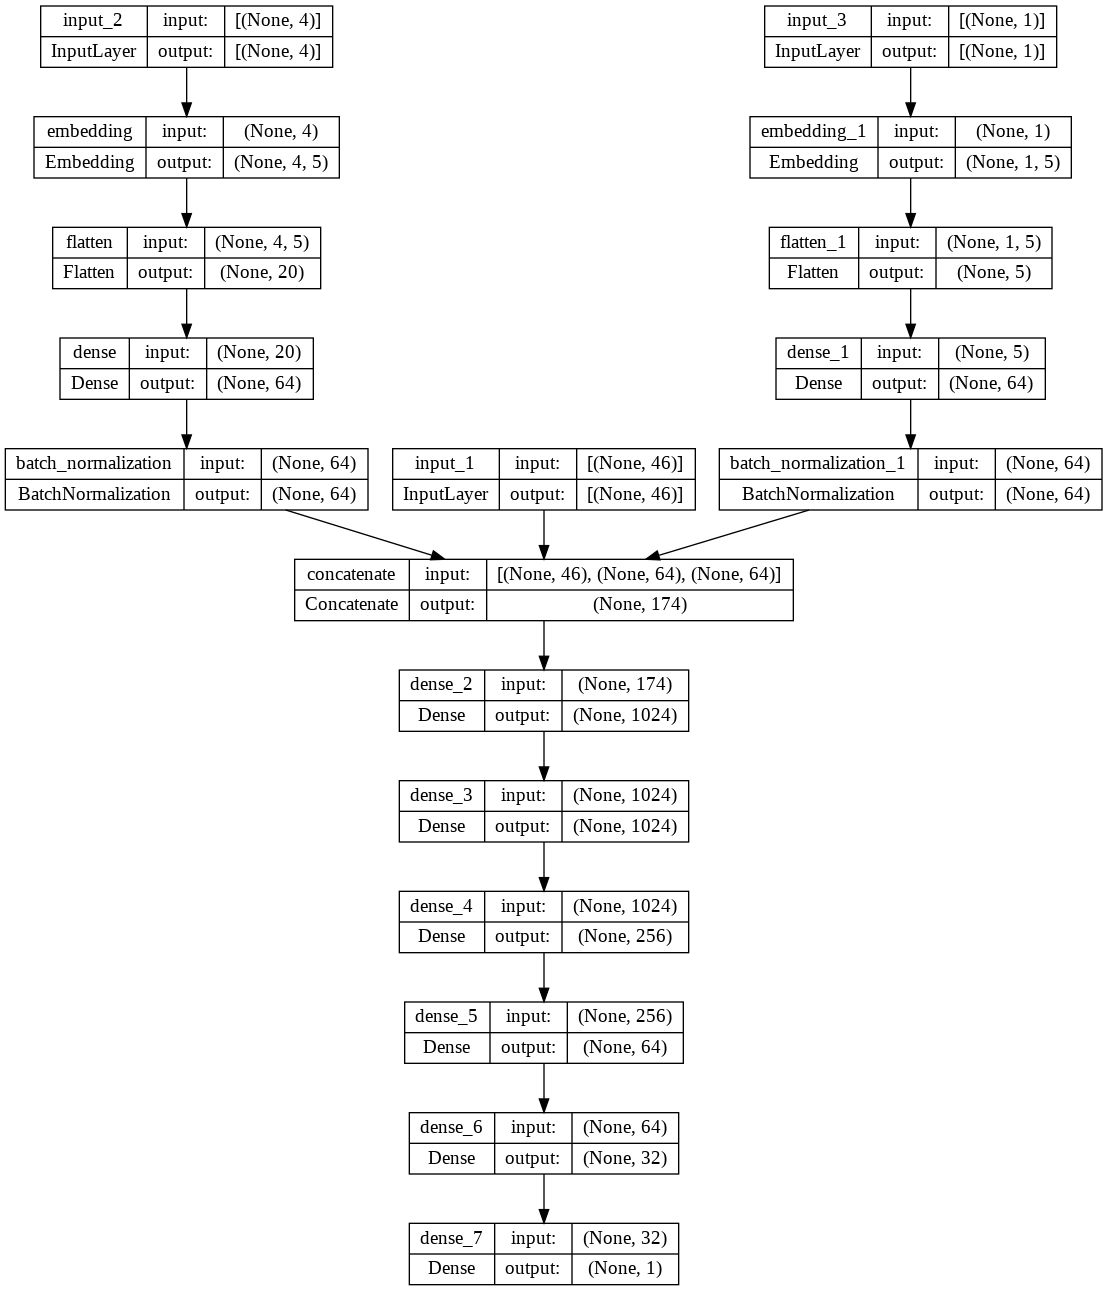

In [31]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [32]:
checkpoint_filepath="/tmp/checkpoint"

history =model.fit(x=[X_train_rest_scaled,X_train_e1,X_train_e2],y=y_train, validation_split=0.2, epochs =150,batch_size=128,
                  callbacks =[
                              tf.keras.callbacks.EarlyStopping(
                                  monitor="loss", patience=5, restore_best_weights=True),
                             tf.keras.callbacks.ModelCheckpoint(
                                 filepath = checkpoint_filepath , 
                                 save_weights_only=True, 
                                 monitor="val_loss",
                                 mode="max",
                                 save_best_only=True)
                          ])

Epoch 1/150
990/990 [==============================] - 7s 7ms/step - loss: 1.2998 - mse: 37.9044 - val_loss: 1.5256 - val_mse: 45.8306
Epoch 2/150
990/990 [==============================] - 7s 7ms/step - loss: 1.2807 - mse: 37.3089 - val_loss: 1.5133 - val_mse: 45.8624
Epoch 3/150
990/990 [==============================] - 7s 7ms/step - loss: 1.2516 - mse: 36.4964 - val_loss: 1.4721 - val_mse: 44.6914
Epoch 4/150
990/990 [==============================] - 7s 7ms/step - loss: 1.2287 - mse: 35.5134 - val_loss: 1.4929 - val_mse: 45.8887
Epoch 5/150
990/990 [==============================] - 7s 7ms/step - loss: 1.2087 - mse: 35.1018 - val_loss: 1.4780 - val_mse: 44.6755
Epoch 6/150
990/990 [==============================] - 7s 7ms/step - loss: 1.1981 - mse: 34.5631 - val_loss: 1.4717 - val_mse: 44.3344
Epoch 7/150
990/990 [==============================] - 7s 7ms/step - loss: 1.1750 - mse: 34.0202 - val_loss: 1.4552 - val_mse: 44.3875
Epoch 8/150
990/990 [==============================] - 

In [33]:
model.evaluate([X_test_rest_scaled,X_test_e1,X_test_e2], y_test)

1650/1650 [==============================] - 5s 3ms/step - loss: 1.2007 - mse: 26.8224


[1.200676679611206, 26.82242202758789]

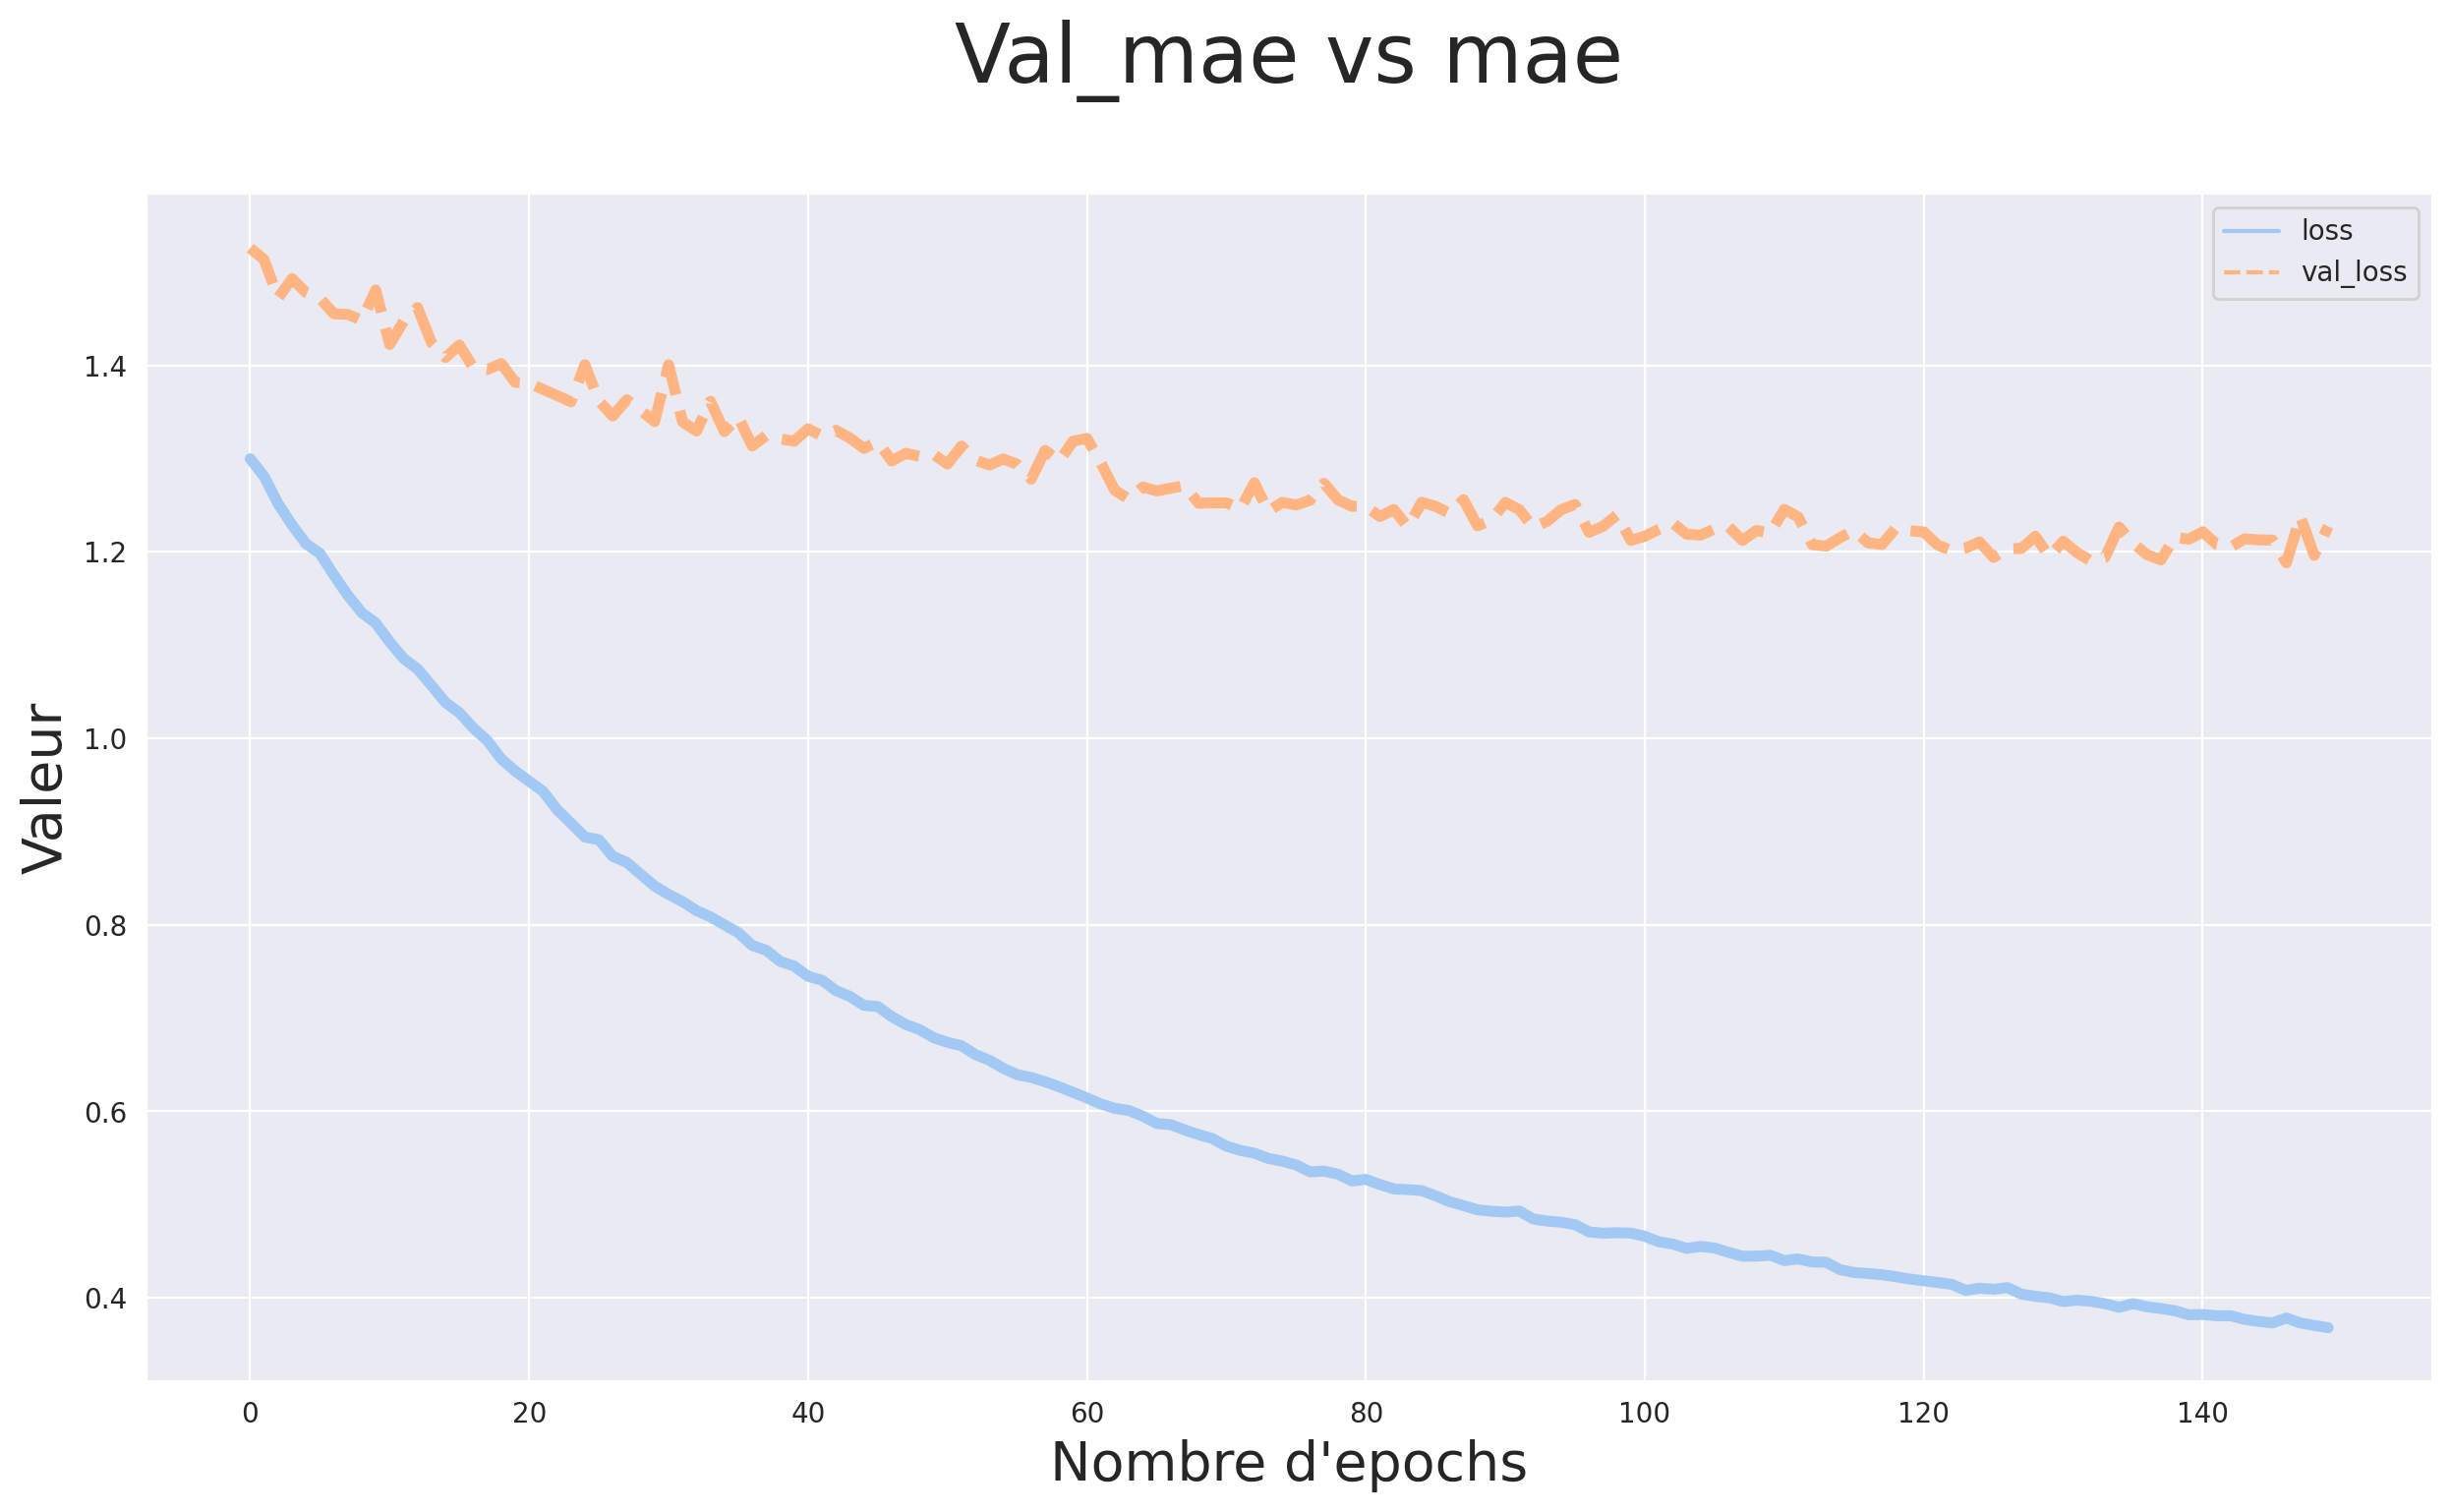

In [34]:
results= pd.DataFrame(history.history).reset_index()
results = results.rename(columns={"index":"epochs"}).set_index("epochs")
sns.lineplot(data=results[["loss","val_loss"]],lw=4)
plt.title("Val_mae vs mae\n", fontsize=30)
plt.ylabel("Valeur",fontsize=20)
plt.xlabel("Nombre d'epochs",fontsize=20)
plt.show()

In [35]:
model.load_weights(checkpoint_filepath)
model.evaluate([X_test_rest_scaled,X_test_e1,X_test_e2], y_test)

1650/1650 [==============================] - 5s 3ms/step - loss: 1.5340 - mse: 41.9909


[1.5339547395706177, 41.99088668823242]